# Torah scraping

### Looking for hidden patterns.
### and not so hidden patterns.
### 2020-4-21
### Joe Hostyk and Alex Zaloum

In [64]:
import csv
from IPython.display import display, clear_output
import os
import itertools
from collections import defaultdict, Counter

import matplotlib
# matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

import spacy
import re

In [65]:
GMATRIA = {"א": 1, "ב": 2, "ג": 3, "ד": 4, "ה": 5, "ו": 6, "ז": 7, "ח": 8, "ט": 9, "י": 10, "כ": 20, "ך": 20, "ל": 30, "מ": 40, "ם": 40, "נ": 50, "ן": 50, "ס": 60, "ע": 70, "פ": 80, "ף": 80, "צ": 90, "ץ": 90, "ק": 100, "ר": 200, "ש": 300, "ת": 400}
ALEPH_BEIS = GMATRIA.keys()

In [66]:
## todo: sofit letters

### Load texts

In [67]:
def getFileNames(folder, additionalSearch = "", hebrewOrEnglish = "Hebrew"):
    """
    Get all our file names for processing later.
    Currently, doesn't recursively search.

    Args:
        folder (str): Full path to the folder.

    Returns:
        filenames (list of strings)
    """

    print ("Getting filenames...")

    filenames = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if ".txt" in file and hebrewOrEnglish in root and additionalSearch in file:
                filenames.append(os.path.join(root, file))
    return filenames

def makeWordDictionaryFromSefer(filename):
    
    seferWords = Counter()
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    seferWords[word] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return seferWords


def makeLetterDictionaryFromSefer(filename, allLetters):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letter in word:
                        allLetters[letter] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allLetters  

def makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letterIndex in range(len(word) - sizeOfngram + 1):
    
                        ngram = word[letterIndex:letterIndex + sizeOfngram]
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def getAllFiles(filenames):
    
    allWords = {}
    allLetters = Counter()
    allNgrams = Counter()
    
    for filename in filenames:
        
        seferName = filename.replace(".txt", "").split("/")[-1]
        print(seferName)
#         allWords[seferName] = makeDictionaryFromSefer(filename)
#         allLetters = makeLetterDictionaryFromSefer(filename, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram = 2)

#         raise
    return allNgrams
        
     

In [68]:
folder = "./texts/Torah"
filenames = getFileNames(folder, additionalSearch = "Text Only")
filenames
# allWords = getAllFiles(filenames)
# allLetters = getAllFiles(filenames)
# allNgrams = getAllFiles(filenames)

Getting filenames...


### Check which pairs never show up in the Torah

In [69]:
allPossiblePairs = list(itertools.product(ALEPH_BEIS, ALEPH_BEIS))
allPossiblePairs = ["".join(pair) for pair in allPossiblePairs]
# allPossiblePairs

In [70]:
print([pair for pair in allPossiblePairs if pair not in allNgrams])

['בף', 'גט', 'גכ', 'גס', 'גצ', 'גץ', 'גק', 'דז', 'דט', 'דס', 'דצ', 'דץ', 'הף', 'הץ', 'זט', 'זס', 'זף', 'זצ', 'זץ', 'זש', 'חא', 'חע', 'טג', 'טז', 'טכ', 'טס', 'טצ', 'טץ', 'טק', 'כץ', 'ךא', 'ךב', 'ךג', 'ךד', 'ךה', 'ךו', 'ךז', 'ךח', 'ךט', 'ךי', 'ךכ', 'ךך', 'ךל', 'ךמ', 'ךם', 'ךנ', 'ךן', 'ךס', 'ךע', 'ךפ', 'ךף', 'ךצ', 'ךץ', 'ךק', 'ךר', 'ךש', 'ךת', 'מף', 'םא', 'םב', 'םג', 'םד', 'םה', 'םו', 'םז', 'םח', 'םט', 'םי', 'םכ', 'םך', 'םל', 'םמ', 'םם', 'םנ', 'םן', 'םס', 'םע', 'םפ', 'םף', 'םצ', 'םץ', 'םק', 'םר', 'םש', 'םת', 'ןא', 'ןב', 'ןג', 'ןד', 'ןה', 'ןו', 'ןז', 'ןח', 'ןט', 'ןי', 'ןכ', 'ןך', 'ןל', 'ןמ', 'ןם', 'ןנ', 'ןן', 'ןס', 'ןע', 'ןפ', 'ןף', 'ןצ', 'ןץ', 'ןק', 'ןר', 'ןש', 'ןת', 'סז', 'סט', 'סצ', 'סץ', 'סש', 'עח', 'עע', 'עף', 'פב', 'פפ', 'ףא', 'ףב', 'ףג', 'ףד', 'ףה', 'ףו', 'ףז', 'ףח', 'ףט', 'ףי', 'ףכ', 'ףך', 'ףל', 'ףמ', 'ףם', 'ףנ', 'ףן', 'ףס', 'ףע', 'ףפ', 'ףף', 'ףצ', 'ףץ', 'ףק', 'ףר', 'ףש', 'ףת', 'צז', 'צס', 'צש', 'ץא', 'ץב', 'ץג', 'ץד', 'ץה', 'ץו', 'ץז', 'ץח', 'ץט', 'ץי', 'ץכ', 'ץך', 'ץל', 'ץמ', 'ץם

### What are the most common pairs in the Torah?

In [71]:
allNgrams.most_common(5)

[('את', 5543), ('וי', 4352), ('אל', 4090), ('ים', 3970), ('יה', 3734)]

In [72]:
### Most common:
allNgrams.most_common(575)

### Least common:
allNgrams.most_common(575)[-30:]

[('טד', 5),
 ('סס', 5),
 ('קא', 4),
 ('כט', 4),
 ('קף', 4),
 ('זם', 4),
 ('חף', 3),
 ('א\u200d', 3),
 ('\u200dש', 3),
 ('זך', 3),
 ('שף', 3),
 ('עס', 3),
 ('זח', 3),
 ('קק', 3),
 ('אט', 3),
 ('פמ', 3),
 ('נץ', 2),
 ('תץ', 2),
 ('לץ', 2),
 ('פף', 2),
 ('זפ', 2),
 ('צץ', 2),
 ('טט', 1),
 ('אץ', 1),
 ('סן', 1),
 ('אא', 1),
 ('צט', 1),
 ('קכ', 1),
 ('הך', 1),
 ('זג', 1)]

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([    3,    70,    70,   830,  1035,  1806,  1836,  2111,  2199,
         2937,  3358,  3976,  4260,  4700,  7039,  7194,  8614,  9889,
        10630, 11270, 14474, 15605, 16357, 17965, 18147, 21583, 27069,
        28085, 30596, 31607]),
 <a list of 29 Patch objects>)

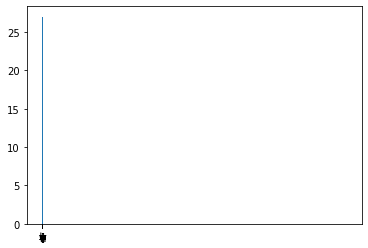

In [73]:
sortedLetters = {k: v for k, v in sorted(allLetters.items(), key=lambda item: item[1])}

plt.hist(list(sortedLetters.keys()), list(sortedLetters.values()))

### Heatmap

In [ ]:
### Todo: make a heatmap of 24x24 letters


### Get gmatrias:

In [4]:
def gmatrifyAword(word):
    """
    Get the gmatria for one word. Doesn't catch punctuation/errors.

    Args:
        word (str)

    Returns:
        The gmatria (int)

    """

    return sum([GMATRIA[letter] for letter in word])

# Numbers, to words with that gmatria

def getGmatrias():
    
    gmatriasToWords = {}

    directory = "./texts/"

    if not os.path.exists(directory):
        os.mkdir("./texts")
    
    pathToGmatriaFile = "{}bamidbarGmatriaByNumber.tsv".format(directory)

    if os.path.exists(pathToGmatriaFile):
        print ("Gmatria file exists. Reading...")
        reader = csv.reader(open(pathToGmatriaFile), delimiter = "\t")
        header = next(reader)
        for line in reader:
            line = dict(zip(header, line))
            word = int(line["Gmatria"])
            shifts = set(line["Word"].split(" | "))
            gmatriasToWords[word] = shifts
        print ("Finished reading.")
    ### To-do: fill this in later
#     else:
#         print ("Gmatria file does not exist. Creating...")
#         with open(pathToGmatriaFile, "w") as out:

#             out.write("Gmatria\tWord\n")

#             
    return gmatriasToWords

In [5]:
gmatriasToWords = getGmatrias()
gmatriasToWords[220]

Gmatria file exists. Reading...
Finished reading.


{'הארדי', 'וטהר', 'וידר', 'וירד', 'ורוח', 'טהור', 'יבחר', 'צפים', 'רוחו'}

## Unique words

In [39]:
folder = "texts/Torah"
torahFileNames = getFileNames("texts/Torah", additionalSearch = "Text Only")
neviyimFileNames = getFileNames("texts/Neviyim", additionalSearch = "Text Only")
ktuvimFileNames = getFileNames("texts/Ktuvim", additionalSearch = "Text Only")

tanachNames = torahFileNames + neviyimFileNames + ktuvimFileNames

sfarimToWords = {}
for filename in tanachNames:
    
#     seferName = filename.replace(".txt", "").split("/")[-1]
    seferName = filename.split("/")[2]
    print(seferName)
    wordsInSefer = makeWordDictionaryFromSefer(filename)
    sfarimToWords[seferName] = wordsInSefer

Getting filenames...
Getting filenames...
Getting filenames...
Vayikra
Shmot
Breishit
Bamidbar
Dvarim
I Samuel
Zephaniah
Haggai
Jeremiah
Joel
I Kings
Amos
Judges
Jonah
Ezekiel
Nahum
II Samuel
Habakkuk
Micah
Obadiah
Hosea
II Kings
Isaiah
Malachi
Joshua
Zechariah
Ecclesiastes
Ezra
Ruth
II Chronicles
Daniel
Proverbs
Lamentations
Nehemiah
Job
Psalms
Song of Songs
I Chronicles
Esther


In [87]:
### Get counts per word, across all of Tanach

tanachToWords = Counter()

for seferName, seferToWords in sfarimToWords.items():
        
    for word, wordCounts in seferToWords.items():
        
        tanachToWords[word] += wordCounts

In [ ]:
### todo write out most common per sefer

In [24]:
sfarim = set(sfarimToWords)
combos = itertools.combinations(sfarim, 2)
for sefer1, sefer2 in combos:

    sefer1words = set(sfarimToWords[sefer1])
    sefer2words = set(sfarimToWords[sefer2])

#     print ("{} has {} words.".format(sefer1, len(sefer1words)))
#     print ("{} has {} words.".format(sefer2, len(sefer2words)))
    print ("{} and {} share {} words.".format(sefer1, sefer2, len(sefer1words.intersection(sefer2words))))
#     print ("{} has {} unique words.".format(sefer1, len(sefer1words.difference(sefer2words))))
#     print ("{} has {} unique words.".format(sefer2, len(sefer2words.difference(sefer1words))))


bamidbar has 3847 words.
bamidbar and dvarim share 1201 words.
bamidbar has 3847 words.
bamidbar and shmot share 1412 words.
bamidbar has 3847 words.
bamidbar and vayikra share 973 words.
bamidbar has 3847 words.
bamidbar and breishit share 1323 words.
dvarim has 4089 words.
dvarim and shmot share 1302 words.
dvarim has 4089 words.
dvarim and vayikra share 858 words.
dvarim has 4089 words.
dvarim and breishit share 1313 words.
shmot has 4171 words.
shmot and vayikra share 1007 words.
shmot has 4171 words.
shmot and breishit share 1482 words.
vayikra has 2710 words.
vayikra and breishit share 860 words.


In [92]:
print ("There are {} total words in Tanach.".format(sum(tanachToWords.values())))

There are 307084 total words in Tanach.


1: aaaab -> ab
2: abbb -> ab
3: aaaac -> ac

totals: a: 9, b: 4, c: 1

compare 1 and 3:
1/9 * 4 = 16/36

compare 1 and 2:
1/9 + 1/4 = 13/36

compare 2 and 3:
1/9 = 4/36


compare 1, 2, and 3:
1/9 = 4/36

a is super common: 2500
b is semi common: 500
c is rare: 2

1: a * 750, b * 249, c * 1
2: a* 999, c * 1
3: a * 750, b * 250


compare 1 and 2:
750/2500 + 1/2

compare 1 and 3:
750/2500, 250/500

problem with larger sfarim
1: 5000 as, 1 c
2: 1a, 1b, 1c
3: 1b, 1c
4: 2500 as, 2500 bs

To normalize, multiply by the number of sfarim we're comparing

In [ ]:
moshe: 700 / 307084
david: 100



In [ ]:
### This counts each word once.

def compareSfarimNaive(listOfSfarim):
    
    unionWords = set()
    intersectionWords = set(sfarimToWords[listOfSfarim[0]])
    
    for sefer in listOfSfarim:
        
        seferWords = set(sfarimToWords[sefer])
        
        unionWords |= seferWords
        intersectionWords &= seferWords
        
    total = len(unionWords)
    shared = len(intersectionWords)
    sharedPercentage = float(shared) / total * 100
    print ("There are {} unique words across the {} sfarim.".format(total, len(listOfSfarim)))
    print ("They share {} of them ({:.2f} percent).".format(shared, sharedPercentage))
    
    ### Weighted shared percentage:
    
    individualSharedPercentages = {}
    
    for sefer in listOfSfarim:
        
        seferWords = set(sfarimToWords[sefer])
        sefersSharedWordsWithAllOtherSfarim = seferWords.intersection(intersectionWords)
        
        sefersSharedPercentage = float(len(sefersSharedWordsWithAllOtherSfarim)) / len(seferWords)
        
        individualSharedPercentages[sefer] = sefersSharedPercentage
    
    meanSharedPercentage = 100 * sum(individualSharedPercentages.values())/len(individualSharedPercentages)
    print ("The average shared percentage is {:.2f}.".format(meanSharedPercentage))
    
    for sefer in listOfSfarim:
        
        print ("{}: {:.2f}".format(sefer, 100*individualSharedPercentages[sefer]))
        
        
    
#     print(intersectionWords)

    

In [124]:
### This uses the Alex Joe weighting system (ie tf=idf?)

def compareSfarimScoring(listOfSfarim):
    
    unionWords = set()
    intersectionWords = set(sfarimToWords[listOfSfarim[0]])

    for sefer in listOfSfarim:
        
        seferWords = set(sfarimToWords[sefer])
        
        unionWords |= seferWords
        intersectionWords &= seferWords
        
    ### Calculate score:
    score = 0
    for word in intersectionWords:
        
        tanachOccurences = float(tanachToWords[word])
        
        amountShared = min([sfarimToWords[sefer][word] for sefer in listOfSfarim])
        
        score += amountShared/tanachOccurences
        

    ### Normalize:
    
    ## Divide by the total words across all the sfarim, to penalize larger sfarim.
    totalWords = len(unionWords)
    
    
    ### Multiply by number of sfarim so that the perfect score can be 1.
    numberOfSfarim = len(listOfSfarim)
    score = score * numberOfSfarim / totalWords
    
    return score

In [125]:
scores[("Bamidbar", "Dvarim")]

194.25800421917864

In [126]:
compareSfarimScoring(["Bamidbar", "Dvarim"])

0.02882593919263669

In [ ]:
### todo: 
### change weighting to not favor bigger sefers. divide by the union
    ### to check that we've removed that bias, plot average score per sefer, versus its size, to make sure
    ### not correlated.
### all pairwise comparisons
### pinwheel visualization - pick the sfarim you want, shows score in middle
### Change weightings to bring in ngrams: right now we've done 1-word comparisons. add in 
### weightings of n-grams of 2, then n-grams of 3.
### Is this just a plagiarism detector? Let's code next time and see.

In [127]:
### All comparisons
sfarimNames = sfarimToWords.keys()
combos = itertools.combinations(sfarimNames, 2)
scores = defaultdict(dict)
for sefer1, sefer2 in combos:
    
    print (sefer1, sefer2)
    score = compareSfarimScoring([sefer1, sefer2])
    
    scores[(sefer1, sefer2)] = score
    scores[(sefer2, sefer1)] = score  
    
    

Vayikra Shmot
Vayikra Breishit
Vayikra Bamidbar
Vayikra Dvarim
Vayikra I Samuel
Vayikra Zephaniah
Vayikra Haggai
Vayikra Jeremiah
Vayikra Joel
Vayikra I Kings
Vayikra Amos
Vayikra Judges
Vayikra Jonah
Vayikra Ezekiel
Vayikra Nahum
Vayikra II Samuel
Vayikra Habakkuk
Vayikra Micah
Vayikra Obadiah
Vayikra Hosea
Vayikra II Kings
Vayikra Isaiah
Vayikra Malachi
Vayikra Joshua
Vayikra Zechariah
Vayikra Ecclesiastes
Vayikra Ezra
Vayikra Ruth
Vayikra II Chronicles
Vayikra Daniel
Vayikra Proverbs
Vayikra Lamentations
Vayikra Nehemiah
Vayikra Job
Vayikra Psalms
Vayikra Song of Songs
Vayikra I Chronicles
Vayikra Esther
Shmot Breishit
Shmot Bamidbar
Shmot Dvarim
Shmot I Samuel
Shmot Zephaniah
Shmot Haggai
Shmot Jeremiah
Shmot Joel
Shmot I Kings
Shmot Amos
Shmot Judges
Shmot Jonah
Shmot Ezekiel
Shmot Nahum
Shmot II Samuel
Shmot Habakkuk
Shmot Micah
Shmot Obadiah
Shmot Hosea
Shmot II Kings
Shmot Isaiah
Shmot Malachi
Shmot Joshua
Shmot Zechariah
Shmot Ecclesiastes
Shmot Ezra
Shmot Ruth
Shmot II Chroni

Micah Song of Songs
Micah I Chronicles
Micah Esther
Obadiah Hosea
Obadiah II Kings
Obadiah Isaiah
Obadiah Malachi
Obadiah Joshua
Obadiah Zechariah
Obadiah Ecclesiastes
Obadiah Ezra
Obadiah Ruth
Obadiah II Chronicles
Obadiah Daniel
Obadiah Proverbs
Obadiah Lamentations
Obadiah Nehemiah
Obadiah Job
Obadiah Psalms
Obadiah Song of Songs
Obadiah I Chronicles
Obadiah Esther
Hosea II Kings
Hosea Isaiah
Hosea Malachi
Hosea Joshua
Hosea Zechariah
Hosea Ecclesiastes
Hosea Ezra
Hosea Ruth
Hosea II Chronicles
Hosea Daniel
Hosea Proverbs
Hosea Lamentations
Hosea Nehemiah
Hosea Job
Hosea Psalms
Hosea Song of Songs
Hosea I Chronicles
Hosea Esther
II Kings Isaiah
II Kings Malachi
II Kings Joshua
II Kings Zechariah
II Kings Ecclesiastes
II Kings Ezra
II Kings Ruth
II Kings II Chronicles
II Kings Daniel
II Kings Proverbs
II Kings Lamentations
II Kings Nehemiah
II Kings Job
II Kings Psalms
II Kings Song of Songs
II Kings I Chronicles
II Kings Esther
Isaiah Malachi
Isaiah Joshua
Isaiah Zechariah
Isaiah Ec

In [128]:
outputFileName = "sfarimComparisons.tsv"
with open(outputFileName, "w") as out:
    
    out.write("Sefer1\tSefer2\tScore\n")
    skipDuplicate = True ### Because we did symmetrical tuples)
    for (sefer1, sefer2), score in sorted(scores.items(), key = lambda sefer: sefer[1], reverse = True):
        
        if skipDuplicate:
            
            out.write("{}\t{}\t{}\n".format(sefer1, sefer2, score))
        skipDuplicate = not skipDuplicate

### Motzaot HaPeh
מוצאות הפה

The 5 Organs of Articulation.

Tnuyot Haotiyot
תנועות האותיות

(From [here](https://www.inner.org/gematria/5origins.php).)

Todo: vowels/non-matres lectiones

In [6]:
## Define the motzaot categories
motzaotToLetters = {}
motzaotToLetters["throat"] = {"א","ח", "ה", "ע"}
motzaotToLetters["palate"] = {"כ","י", "ג", "ק", "ך"}
motzaotToLetters["tongue"] = {"ר" ,"ס", "ש", "ז", "צ", "ץ"}
motzaotToLetters["teeth"] = {"נ" ,"ל", "ט", "ד", "ת", "ן"}
motzaotToLetters["lips"] = {"פ" ,"מ", "ו", "ב", "ם", "ף"}

lettersToMotzaot = {}
for organ, letters in motzaotToLetters.items():
    
    for letter in letters:
        lettersToMotzaot[letter] = organ
        
# motzaotToKey = {"throat": "t", "palate": "p", "tongue": "g", "teeth": "e", "lips": "l"}

In [14]:
def convertWordToMotzaot(word):
    
#     convertedWord = [motzaotToKey[lettersToMotzaot[letter]] for letter in word]
    convertedWord = [lettersToMotzaot[letter] for letter in word]
    ### Change from list to string:
    convertedWord = "".join(convertedWord)
    return convertedWord

In [41]:
def makeDictionariesFromSefer(filename, allWords, allLetters):
    
    problematicWords = set()
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    ### Change to motzaot:
                    convertedWord = convertWordToMotzaot(word)
                    allWords[convertedWord] += 1
                    
                    for letter in convertedWord.split("_"):
                        allLetters[letter] += 1                    
                except KeyError as e:
                    problematicWords.add(word)
    return allWords, allLetters


def makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram):
    
    problematicWords = set()
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    
                    convertedWord = convertWordToMotzaot(word).split("_")
                    
                    for letterIndex in range(len(convertedWord) - sizeOfngram + 1):
                        
    
                        ngram = "_".join(convertedWord[letterIndex:letterIndex + sizeOfngram])
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def runOnWholeTorah(seferFilenames):
    
    allWords = Counter()
    allLetters = Counter()
    allNgrams = Counter()
    
    for seferFilename in seferFilenames:
        
        seferName = seferFilename.replace(".txt", "").split("/")[-1]
        print(seferName)
        allWords, allLetters = makeDictionariesFromSefer(seferFilename, allWords, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(seferFilename, allNgrams, sizeOfngram = 3)

    return allWords, allLetters, allNgrams

     

In [42]:
folder = "./texts/Torah"
seferFilenames = getFileNames(folder)
allWords, allLetters, allNgrams = runOnWholeTorah(seferFilenames)


Getting filenames...
vayikra
dvarim
breishit
shmot
bamidbar


In [35]:
allLetters.most_common(5)

[('lips', 76863),
 ('throat', 73615),
 ('teeth', 62542),
 ('palate', 50390),
 ('tongue', 41753)]

In [38]:
allWords.most_common(5)


[('lips_palate_tongue_tongue_palate_throat_teeth', 1),
 ('teeth_lips_throat_palate_teeth_lips', 1),
 ('lips_throat_palate_tongue_palate_teeth_lips', 1),
 ('lips_teeth_teeth_lips_tongue_lips', 1),
 ('palate_throat_teeth_lips_teeth_lips', 1),
 ('teeth_throat_teeth_palate_lips_lips', 1),
 ('teeth_lips_teeth_teeth_palate_lips', 1),
 ('lips_lips_teeth_throat_teeth_teeth', 1),
 ('lips_teeth_throat_palate_palate_teeth_throat', 1),
 ('teeth_teeth_palate_throat_teeth', 1)]

In [44]:
allNgrams.most_common()[-10:]

[('tongue_tongue_teeth', 274),
 ('lips_lips_lips', 256),
 ('tongue_teeth_teeth', 249),
 ('tongue_teeth_tongue', 244),
 ('teeth_tongue_tongue', 211),
 ('teeth_teeth_tongue', 154),
 ('throat_throat_throat', 146),
 ('palate_throat_throat', 125),
 ('palate_palate_palate', 78),
 ('tongue_tongue_tongue', 69)]

### Basic histogram/breakdowns:
    
#### Letters, pairs of letters

In [ ]:
allWords
for 

### LDA:

# Talmud

In [14]:
## Load:
folder = "texts/Talmud"
masechetFilenames = getFileNames(folder, hebrewOrEnglish = "English")
print ("There are {} masechtot.".format(len(masechetFilenames)))

Getting filenames...
There are 37 masechtot.


In [32]:
# yikes
def masechetFromFilename(masechetFilename):
    
    splitName = masechetFilename.split("/")
    nextIndex = splitName.index("English")
    masechetName = splitName[nextIndex - 1]
    
    return masechetName

Ran the spaCy code below to get all people in the Talmud. That had lots of false positives (e.g. "Leviticus 8:11", "chews ginger"), so took all lines with "Rav", "Rabb", and "The" in them, to get most of the true hits.
(Missing people like "Berurya" or "Ḥoni HaMe’aggel" with this, though.)

In [86]:
rabbis = set([person.strip() for person in open("RavRabbThe.txt", "r")])
print("Working with {} rabbis from the Talmud.".format(len(rabbis)))


Working with 1666 rabbis from the Talmud.


In [67]:
nlp = spacy.load('en_core_web_sm')
lineNumber = 0
people = set()
rabbisToMasechet = defaultdict(Counter)
masechetToRabbis = defaultdict(Counter)

for filename in masechetFilenames:
    
    masechetName = masechetFromFilename(filename)
    print ("\r{}\r".format(masechetName))
    reader = open(filename, "r")
    for line in reader:
        
        ### Skip the header info, and the whitespace/daf numbers
        lineNumber += 1
        if lineNumber < 21 or len(line) < 13:
            continue
        line = re.sub('<[^<]+?>', '', line) # ayy https://stackoverflow.com/a/4869782

        ### Incredible https://spacy.io/usage/linguistic-features#named-entities
        doc = nlp(line)            
        for entity in doc.ents:
            
            ### First pass: get all the people (lots of false positives):
#             if entity.label_ == "PERSON" and entity.text in rabbis:
#                 people.add(entity)
                
            ### Next round: use that to make an edited list:
            if entity.label_ == "PERSON" and entity.text in rabbis:
                rabbisToMasechet[entity.text][masechetName] += 1
                masechetToRabbis[masechetName][entity.text] += 1

Niddah
Chagigah
Yoma
Rosh Hashanah
Moed Katan
Beitzah
Sukkah
Megillah
Taanit
Pesachim
Shabbat
Eruvin
Berakhot
Horayot
Avodah Zarah
Bava Batra
Shevuot
Sanhedrin
Bava Metzia
Bava Kamma
Makkot
Sotah
Kiddushin
Nazir
Yevamot
Gittin
Ketubot
Nedarim
Zevachim
Meilah
Bekhorot
Temurah
Keritot
Menachot
Arakhin
Chullin
Tamid


In [44]:
### First round: save all the spaCy results.

# peopleToText = {name.text for name in people}
# with open("talmudPeople.txt", "w") as out:
#     out.write("\n".join(peopleToText))

In [85]:
### Second round: save the more accurate counts.

sortedRabbis = sorted(rabbis)
with open("RabbiCounts.tsv", "w") as out:
    
    masechtot = sorted(masechetToRabbis)
    out.write("\t{}\n".format("\t".join(masechtot)))
    
    for rabbi in sortedRabbis:
        
        rabbiCounts = rabbisToMasechet[rabbi]
        sortedCounts = [str(rabbiCounts[masechet]) for masechet in masechtot]
        
        out.write("{r}\t{c}\n".format(r = rabbi, c = "\t".join(sortedCounts)))

### Exact Matching (without spaCy)

Alternative (quicker) way that doesn't use spaCy, so it doesn't do true entity recognition and just searches for any matches. Runs instantly, but counts "Rav" a bunch because it counts "Rav x" for Rav as well.

In [68]:
# rabbisToMasechet = defaultdict(Counter)
# masechetToRabbis = defaultdict(Counter)

# for filename in masechetFilenames:
        
#     masechetName = masechetFromFilename(filename)
#     print ("\r{}\r".format(masechetName))
#     with open(filename, "r") as masechet:
        
#         text = masechet.read()
#         for rabbi in rabbis:
#             appearances = text.count(rabbi)
            
#             if appearances != 0:
#                 rabbisToMasechet[rabbi][masechetName] += appearances
#                 masechetToRabbis[masechetName][rabbi] += appearances
                            

In [84]:
### Big to print
# print(rabbisToMasechet)
# print(masechetToRabbis)

Exploratory:

In [78]:
def formattedCounts(counts):
    
    formatted = "\t" + "; ".join(["{}: {}".format(value, count) for value, count in counts])
    return formatted
    
rabbi = "Rabbi Yehuda"
masechet = "Berakhot"
### Most common:

print("{}'s most common:\n".format(rabbi), formattedCounts(rabbisToMasechet[rabbi].most_common(5)))
print("{}'s most common:\n".format(masechet), formattedCounts(masechetToRabbis[masechet].most_common(5)))
print()

### Least common:

print("{}'s least common:\n".format(rabbi), formattedCounts(rabbisToMasechet[rabbi].most_common()[-5:]))
print("{}'s least common:\n".format(masechet), formattedCounts(masechetToRabbis[masechet].most_common()[-10:]))

Rabbi Yehuda's most common:
 	Shabbat: 446; Pesachim: 409; Chullin: 406; Eruvin: 395; Menachot: 322
Berakhot's most common:
 	Rabbi Yoḥanan: 292; Rabbi Yehuda: 222; Rav: 219; Rava: 122; Rabbi Yosei: 110

Rabbi Yehuda's least common:
 	Horayot: 48; Rosh Hashanah: 40; Chagigah: 37; Meilah: 16; Tamid: 2
Berakhot's least common:
 	Rav Sama: 1; Rabbi Yosei bar Yehuda: 1; Rabbi Parnakh: 1; Rav Huna bar Berekhya: 1; Rabbi Elazar HaKappar: 1; Rabbi Yosei ben Keifar: 1; Zekharya ben Kevutal: 1; Zekharya ben: 1; the Sages of the Mishna: 1; Rav Yehuda bar Zevida: 1


Full counts across the whole Talmud:

In [79]:
rabbisFullCounts = Counter()

for rabbi, masechetCounts in rabbisToMasechet.items():
    
    masechetTotalCounts = sum(masechetCounts.values())
    rabbisFullCounts[rabbi] += masechetTotalCounts

In [80]:
rabbisFullCounts.most_common(30)

[('Rabbi Yoḥanan', 6473),
 ('Rabbi Yehuda', 6335),
 ('Rav', 5819),
 ('Rabbi Shimon', 3915),
 ('Rabbi Meir', 3756),
 ('Rabbi Yosei', 3589),
 ('Rabbis', 3552),
 ('Rava', 3507),
 ('Rabbi Eliezer', 3123),
 ('Rabbi Yehuda HaNasi', 3079),
 ('Rabbi Akiva', 2926),
 ('Rabbi Elazar', 2712),
 ('Rav Huna', 2481),
 ('Rav Yehuda', 2432),
 ('Rav Ashi', 2241),
 ('Rav Pappa', 2027),
 ('Rav Yosef', 1965),
 ('Rav Ḥisda', 1742),
 ('Rabba', 1664),
 ('Rabbi Yishmael', 1583),
 ('Rabbi Ḥiyya', 1421),
 ('Rabbi Yehoshua', 1344),
 ('Rabbi Ḥanina', 1171),
 ('Rabbi Zeira', 1148),
 ('Rav Sheshet', 1029),
 ('Rabban Gamliel', 848),
 ('Rav Kahana', 764),
 ('Shimon ben Gamliel', 717),
 ('Ravina', 699),
 ('Rabbi Yehoshua ben Levi', 685)]